In [1]:
# project: p1
#submitter: rjfischer
#partner: none

In [2]:
from subprocess import check_output
import os
import json

In [3]:
#q1
check_output(["git", "checkout", "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4"],cwd='repo')
output=check_output(["git", "log"],cwd="repo")
str_output=str(output,encoding="utf-8")
Log=str_output.split()
Num_Commits=0
for i in Log:
    if i=="commit":
        Num_Commits+=1
Num_Commits

8

In [4]:
#q2
D={}
Next=False
for i in Log:
    if Next:
        Next=False
        if i in D:
            D[i]+=1
        else:
            D[i]=1
    if i=="Author:":
        Next=True
D

{'Steve': 3, 'Ada': 3, 'Linus': 2}

Text(0, 0.5, 'Commit Count')

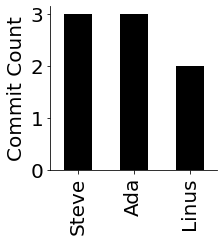

In [5]:
#q3
import pandas as pd
from pandas import Series
from matplotlib import pyplot as plt
import matplotlib


%matplotlib inline

def get_ax():
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

matplotlib.rcParams['font.size']=20

D=Series(D)
ax=get_ax()
D.plot.bar(figsize=(3,3),color="0")
ax.set_ylabel("Commit Count")

In [6]:
#q4
Commits=[]
Next=False
for i in Log:
    if Next:
        Next=False
        Commits.append(i)
    if i=="commit":
        Next=True

L=[]
for Commi in Commits:
    check_output(['git','checkout',Commi],cwd="repo")
    L.append(len(list(open('repo/wc.py','r'))))
    
L.reverse()
L

[21, 35, 35, 39, 40, 40, 40, 43]

(-0.35000000000000003, 7.35, 0.0, 44.1)

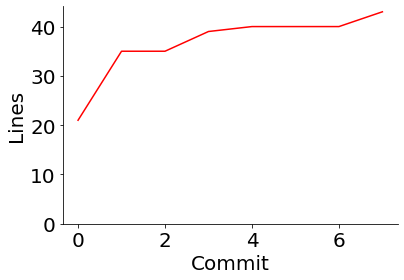

In [7]:
#q5
L=Series(L)
ax=get_ax()
L.plot.line(color='red')
ax.set_ylabel("Lines")
ax.set_xlabel("Commit")
ax.axis(ymin=0)




In [8]:
import subprocess

def run_wc(body, commit=None):
    if commit==None:
        check_output(["git", "checkout", "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4"],cwd='repo')
    else:
        check_output(["git", "checkout", commit],cwd='repo')
      
    file=open('repo/test.txt','w')
    file.write(body)
    file.close()
    
    try:
        output=check_output(['python3','wc.py','test.txt','all'],cwd='repo',universal_newlines=True)
        output=json.loads(output)
        return output
    except subprocess.CalledProcessError:
        pass
# test inputs to exercise wc.py

# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""

# expected result: 
test2 = """A B
A C
"""

# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c
"""

In [9]:
#q6
run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [10]:
#q7
run_wc(test3)

{'A': 2, 'B': 1, 'C': 1}

In [11]:
Commits=[]
Next=False
for i in Log:
    if Next:
        Next=False
        Commits.append(i)
    if i=="commit":
        Next=True
Commits.reverse()

Authors=[]
Next=False
for i in Log:
    if Next:
        Next=False
        Authors.append(i)
    if i=="Author:":
        Next=True
Authors.reverse()

Pass=[False,False,False,False,False,False,False,False]

def test_table(body, expected):
    for i in range(len(Commits)):
        if run_wc(body,Commits[i])==expected:
            Pass[i]=True
        else:
            Pass[i]=False 
    df=pd.DataFrame({"commit":Commits,"author":Authors,"pass":Pass})
    return df

In [12]:
#q8
test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [13]:
#q9
test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [14]:
#q10
test_table(test3, {'A': 2, 'B': 1, 'C': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [15]:
#Test input test3 is the best because it includes lower and upper case letters

In [16]:
import random
import string
import time

def time_run_sec(uniq_words, total_words, word_size=6, commit=None):
    words=[]
    alphabet=string.ascii_lowercase
    for word_num in range(uniq_words):
        word=""
        for letter_num in range(word_size):
            word+=(random.choice(alphabet))
        words.append(word)
    
    body=""
    for word in range(total_words):
        body+=(random.choice(words)+' ')
    
    t1=time.time()
    run_wc(body,commit)
    t2=time.time()
    return (t2-t1)

versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}

(10.0, 7112.09527087124, 3.5, -0.5)

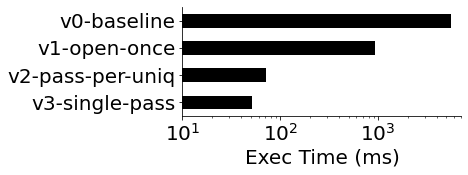

In [17]:
#q11
Time={}
for version in versions:
    Time[version]=(time_run_sec(100,5000,6,commit=versions[version]))*1000

Time=Series(Time)

ax=get_ax()
Time.plot.barh(color="0",logx=True,figsize=(5,2))
ax.set_xlabel("Exec Time (ms)")
ax.invert_yaxis()
ax.axis(xmin=10)

(10.0, 8318.75422438301, 3.5, -0.5)

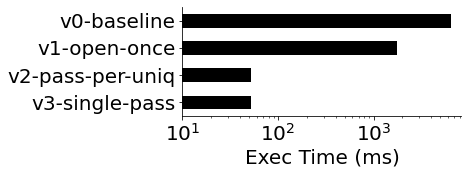

In [18]:
#q12
Time={}
for version in versions:
    Time[version]=(time_run_sec(1,5000,6,commit=versions[version]))*1000

Time=Series(Time)

ax=get_ax()
Time.plot.barh(color="0",logx=True,figsize=(5,2))
ax.set_xlabel("Exec Time (ms)")
ax.invert_yaxis()
ax.axis(xmin=10)

In [19]:
#V3 does better than V2 when the list contains more than 1 unique word.

In [20]:
#Part 4 Complexity
def performance(commit):
    total_words=[1000,2000,5000,10000]
    perc_uniq=[10,5,1]
    data={10:[],5:[],1:[]}
    
    for num_words in total_words:
        for num_uniq in perc_uniq:
            data[num_uniq].append(time_run_sec((int(num_uniq*num_words*.01)),num_words,commit=commit))
    df=pd.DataFrame(data,columns=perc_uniq,index=total_words)
    return df


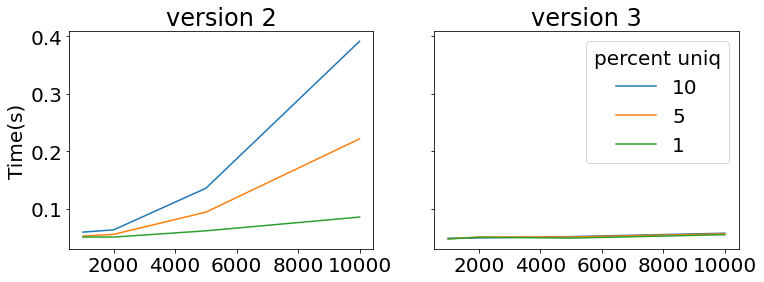

In [21]:
#q13
df1=performance(versions["v2-pass-per-uniq"])
df2=performance(versions["v3-single-pass"])

f, (ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(12,4))
ax1.plot(df1)
ax2.plot(df2)
ax1.set_title("version 2")
ax2.set_title("version 3")
ax1.set_ylabel("Time(s)")
ax2.legend([10,5,1],title="percent uniq")

In [22]:
class Commit:
    def __init__(self, commit_hex, author, message):
        self.commit_hex=commit_hex
        self.author=author
        self.message=message
    def __str__(self):
        return (self.commit_hex+'['+self.author+']: '+self.message)
    
    

class Repo:
    def __init__(self):
        pass

    def commit(self, commit_hex, author, message):
        self=Commit(commit_hex, author, message)
        return self
    
    def __getitem__(self,lookup):
        c=[c1,c2,c3,c4,c5,c6]
        if type(lookup)==int:
            return c[lookup]
        elif type(lookup)==str:
            lookup=lookup.upper()
            lookup=lookup.strip()
            for commit in c:
                if commit.commit_hex==lookup:
                    return commit
            


In [23]:
#q14
repo = Repo()
c1 = repo.commit("A39DE2", "Aarushi", "created the repo")
c2 = repo.commit("D1E9C5", "Ben", "wrote some code")
c3 = repo.commit("AA0912", "Emma", "added a readme")
c4 = repo.commit("B143D0", "Hunter", "made some tests")
c5 = repo.commit("F0148D", "Jaime", "fixed a bug")
c6 = repo.commit("B978EE", "Wendy", "optimized the code")
c1.commit_hex, c2.author, c3.message, c4.commit_hex, c5.author, c6.message

('A39DE2', 'Ben', 'added a readme', 'B143D0', 'Jaime', 'optimized the code')

In [24]:
#q15
str(c1), str(repo[1]), str(repo[-1])

('A39DE2[Aarushi]: created the repo',
 'D1E9C5[Ben]: wrote some code',
 'B978EE[Wendy]: optimized the code')

In [25]:
#q16
str(repo["F0148D"]), str(repo["b143d0"]), str(repo["  AA0912  "])

('F0148D[Jaime]: fixed a bug',
 'B143D0[Hunter]: made some tests',
 'AA0912[Emma]: added a readme')